<a href="https://colab.research.google.com/github/eyash24/Data-Science/blob/main/Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series
Following Krish Naik Time Series playlist:
https://youtube.com/playlist?list=PL-Pz4FzhSKySariBuJv8SD5VDbat0XNL_&si=fibUSJSa_1m61hKY

## Time Series EDA

In [ ]:
# Installing Pandas Data Reader
! pip install pandas-datareader

In [ ]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

In [ ]:

# pdr.get_data_yahoo('TSLA')

AttributeError: 'NoneType' object has no attribute 'group'

In [ ]:
import yfinance as yf

company = 'TSLA'

# Define a start date and End Date
start = datetime(2017,2,27)
end =  datetime(2022,2,24)

# Read Stock Price Data
data = yf.download(company, start , end)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-02-27,16.544666,16.557333,16.134001,16.415333,16.415333,171912000
2017-02-28,16.279333,16.733334,16.260000,16.666000,16.666000,91171500
2017-03-01,16.945333,16.990000,16.607332,16.667999,16.667999,72142500
2017-03-02,16.647333,16.885332,16.551332,16.698668,16.698668,50277000
2017-03-03,16.716000,16.793333,16.600000,16.771334,16.771334,43791000
...,...,...,...,...,...,...
2022-02-16,304.683319,308.809998,300.403320,307.796661,307.796661,51294300
2022-02-17,304.420013,306.166656,291.366669,292.116669,292.116669,55178400
2022-02-18,295.333344,295.623322,279.203339,285.660004,285.660004,68501700


In [ ]:
df_tesla = data

<Axes: xlabel='Date'>

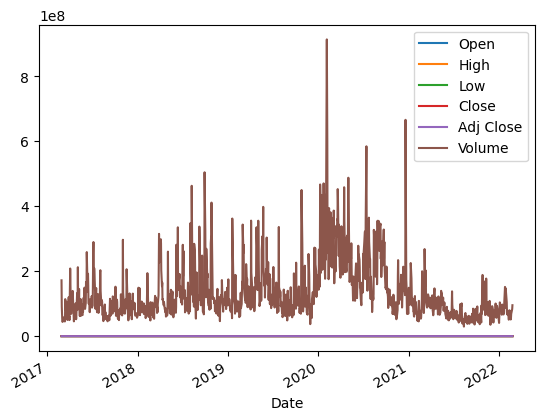

In [ ]:
df_tesla.plot()

<Axes: xlabel='Date'>

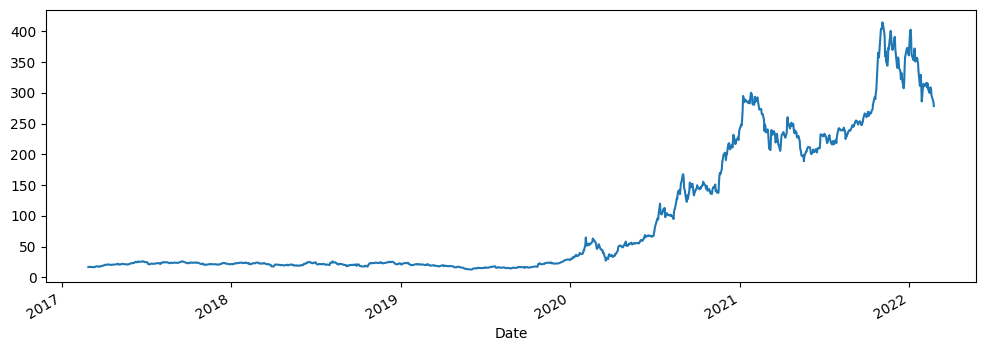

In [ ]:
df_tesla['High'].plot(figsize=(12,4))

<Axes: xlabel='Date'>

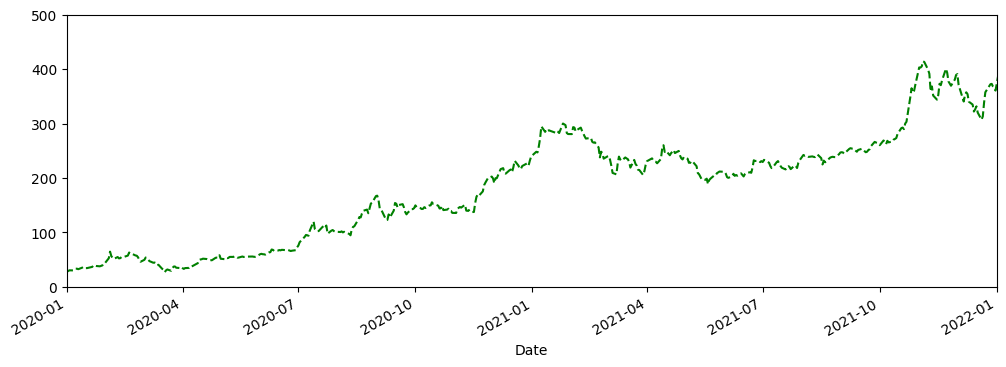

In [ ]:
# setting x- and y-limit
df_tesla['High'].plot(
    xlim=['2020-01-01', '2022-01-01'],
    ylim=[0,500],
    figsize=(12,4),
    c='green',
    ls='--'
)

In [ ]:
index = df_tesla.loc['2020-01-01':'2022-09-01'].index
share_open = df_tesla.loc['2020-01-01':'2022-09-01']['Open']

In [ ]:
share_open

Date
2020-01-02     28.299999
2020-01-03     29.366667
2020-01-06     29.364668
2020-01-07     30.760000
2020-01-08     31.580000
                 ...    
2022-02-16    304.683319
2022-02-17    304.420013
2022-02-18    295.333344
2022-02-22    278.043335
2022-02-23    276.809998
Name: Open, Length: 541, dtype: float64

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
index.shape, share_open.shape

((541,), (541,))

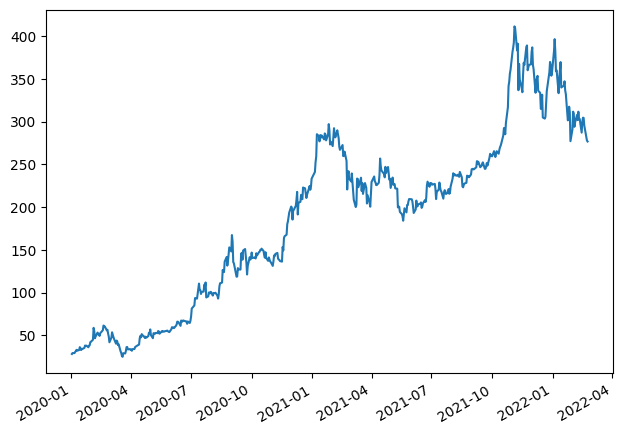

In [ ]:
figure, axis = plt.subplots()
plt.tight_layout()
figure.autofmt_xdate()
axis.plot(index, share_open)

In [ ]:
# Datetime Index
df_tesla = df_tesla.reset_index()

In [ ]:
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1258 non-null   datetime64[ns]
 1   Open       1258 non-null   float64       
 2   High       1258 non-null   float64       
 3   Low        1258 non-null   float64       
 4   Close      1258 non-null   float64       
 5   Adj Close  1258 non-null   float64       
 6   Volume     1258 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 68.9 KB


In [ ]:
pd.to_datetime(df_tesla['Date'])

0      2017-02-27
1      2017-02-28
2      2017-03-01
3      2017-03-02
4      2017-03-03
          ...    
1253   2022-02-16
1254   2022-02-17
1255   2022-02-18
1256   2022-02-22
1257   2022-02-23
Name: Date, Length: 1258, dtype: datetime64[ns]

In [ ]:
df_tesla.set_index('Date', drop=True, inplace=True)

KeyError: "None of ['Date'] are in the columns"

In [ ]:
df_tesla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-02-27,16.544666,16.557333,16.134001,16.415333,16.415333,171912000
2017-02-28,16.279333,16.733334,16.260000,16.666000,16.666000,91171500
2017-03-01,16.945333,16.990000,16.607332,16.667999,16.667999,72142500
2017-03-02,16.647333,16.885332,16.551332,16.698668,16.698668,50277000
2017-03-03,16.716000,16.793333,16.600000,16.771334,16.771334,43791000


In [ ]:
datetime.now()

datetime.datetime(2024, 7, 8, 8, 37, 21, 890888)

### Time Resampling
Article for reference: https://towardsdatascience.com/resample-function-of-pandas-79b17ec82a78

In [ ]:
# rule = 'A' means year and frequency
df_tesla.resample(rule='A').min()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-31,16.279333,16.433332,16.134001,16.246000,16.246000,43791000
2018-12-31,16.851999,17.355333,16.306000,16.704000,16.704000,46210500
2019-12-31,12.073333,12.445333,11.799333,11.931333,11.931333,36984000
2020-12-31,24.980000,26.990667,23.367332,24.081333,24.081333,52073100
2021-12-31,184.183334,188.736664,179.830002,187.666672,187.666672,29401800
2022-12-31,276.809998,278.433319,253.520004,254.679993,254.679993,50729100


In [ ]:
df_tesla.resample(rule='A').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-31,25.779333,25.974001,25.290001,25.666668,25.666668,296871000
2018-12-31,25.000000,25.830667,24.474667,25.304667,25.304667,504745500
2019-12-31,29.000000,29.020666,28.423332,28.729334,28.729334,450091500
2020-12-31,233.330002,239.573334,230.373337,235.223328,235.223328,914082000
2021-12-31,411.470001,414.496674,405.666656,409.970001,409.970001,268189500
2022-12-31,396.516663,402.666656,378.679993,399.926666,399.926666,151565700


<Axes: xlabel='Date'>

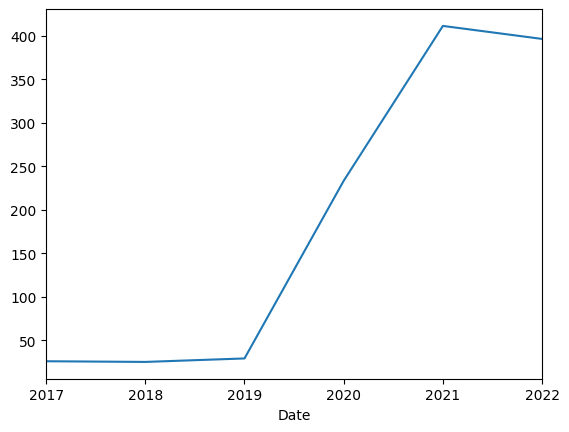

In [ ]:
df_tesla.resample(rule='A').max()['Open'].plot()

In [ ]:
# quaterly start frequency
df_tesla.resample(rule='QS').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-01,18.582001,18.799999,18.480667,18.553333,18.553333,171912000
2017-04-01,25.779333,25.799334,25.290001,25.563334,25.563334,258921000
2017-07-01,25.350000,25.974001,25.178667,25.666668,25.666668,289867500
2017-10-01,23.798668,24.200001,23.608667,23.976667,23.976667,296871000
2018-01-01,24.000000,24.033333,23.490667,23.827999,23.827999,315021000
2018-04-01,24.344000,24.915333,23.633333,24.722000,24.722000,335211000
2018-07-01,24.606001,25.830667,24.474667,25.304667,25.304667,504745500
2018-10-01,25.000000,25.299334,24.450001,25.119333,25.119333,411382500
2019-01-01,23.080667,23.466667,22.943333,23.153999,23.153999,362262000


<Axes: xlabel='Date'>

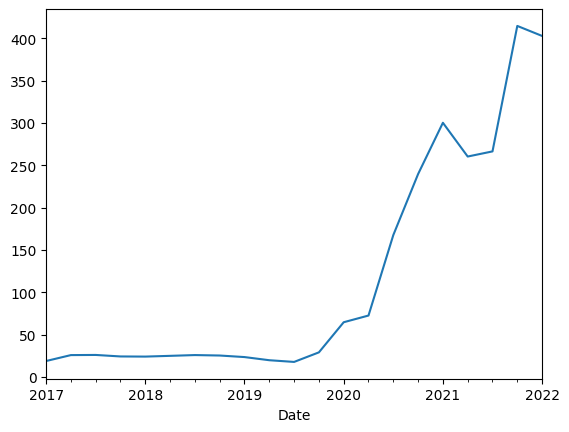

In [ ]:
df_tesla.resample(rule='QS').max()['High'].plot()

In [ ]:
# Business End Frequency
df_tesla.resample(rule='BA').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-29,25.779333,25.974001,25.290001,25.666668,25.666668,296871000
2018-12-31,25.000000,25.830667,24.474667,25.304667,25.304667,504745500
2019-12-31,29.000000,29.020666,28.423332,28.729334,28.729334,450091500
2020-12-31,233.330002,239.573334,230.373337,235.223328,235.223328,914082000
2021-12-31,411.470001,414.496674,405.666656,409.970001,409.970001,268189500
2022-12-30,396.516663,402.666656,378.679993,399.926666,399.926666,151565700


In [ ]:
df_tesla.resample(rule='BQS').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,18.582001,18.799999,18.480667,18.553333,18.553333,171912000
2017-04-03,25.779333,25.799334,25.290001,25.563334,25.563334,258921000
2017-07-03,25.350000,25.974001,25.178667,25.666668,25.666668,289867500
2017-10-02,23.798668,24.200001,23.608667,23.976667,23.976667,296871000
2018-01-01,24.000000,24.033333,23.490667,23.827999,23.827999,315021000
2018-04-02,24.344000,24.915333,23.633333,24.722000,24.722000,335211000
2018-07-02,24.606001,25.830667,24.474667,25.304667,25.304667,504745500
2018-10-01,25.000000,25.299334,24.450001,25.119333,25.119333,411382500
2019-01-01,23.080667,23.466667,22.943333,23.153999,23.153999,362262000


<Axes: xlabel='Date'>

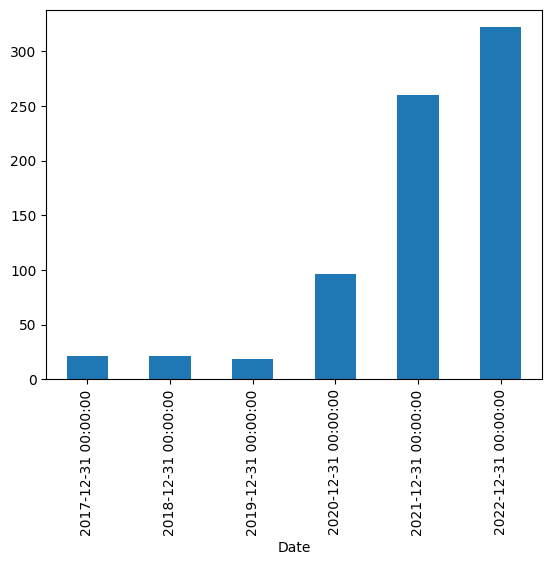

In [ ]:
# plotting
df_tesla['Open'].resample(rule='A').mean().plot(kind='bar')

<Axes: xlabel='Date'>

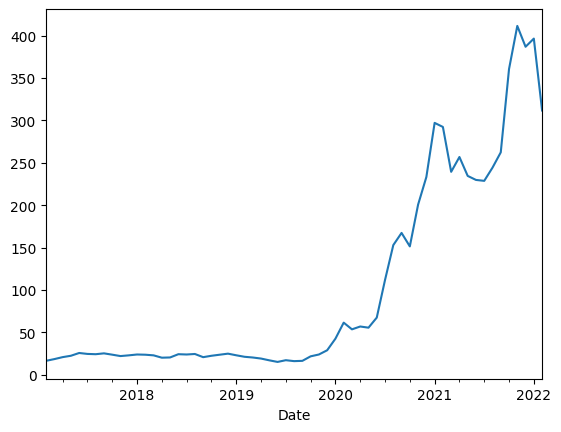

In [ ]:
df_tesla['Open'].resample(rule='M').max().plot()

In [ ]:
df_tesla['High'].rolling(10).mean().head(20)

Date
2017-02-27          NaN
2017-02-28          NaN
2017-03-01          NaN
2017-03-02          NaN
2017-03-03          NaN
2017-03-06          NaN
2017-03-07          NaN
2017-03-08          NaN
2017-03-09          NaN
2017-03-10    16.734733
2017-03-13    16.724667
2017-03-14    16.772133
2017-03-15    16.813133
2017-03-16    16.896267
2017-03-17    16.985800
2017-03-20    17.071467
2017-03-21    17.144200
2017-03-22    17.177534
2017-03-23    17.237600
2017-03-24    17.353534
Name: High, dtype: float64

In [ ]:
df_tesla['Open:30 days rolling'] = df_tesla['Open'].rolling(30).mean()

In [ ]:
df_tesla['Open:30 days rolling'].head(50)

Date
2017-02-27          NaN
2017-02-28          NaN
2017-03-01          NaN
2017-03-02          NaN
2017-03-03          NaN
2017-03-06          NaN
2017-03-07          NaN
2017-03-08          NaN
2017-03-09          NaN
2017-03-10          NaN
2017-03-13          NaN
2017-03-14          NaN
2017-03-15          NaN
2017-03-16          NaN
2017-03-17          NaN
2017-03-20          NaN
2017-03-21          NaN
2017-03-22          NaN
2017-03-23          NaN
2017-03-24          NaN
2017-03-27          NaN
2017-03-28          NaN
2017-03-29          NaN
2017-03-30          NaN
2017-03-31          NaN
2017-04-03          NaN
2017-04-04          NaN
2017-04-05          NaN
2017-04-06          NaN
2017-04-07    17.557800
2017-04-10    17.693311
2017-04-11    17.847067
2017-04-12    17.962978
2017-04-13    18.067400
2017-04-17    18.182867
2017-04-18    18.297956
2017-04-19    18.410267
2017-04-20    18.542511
2017-04-21    18.663333
2017-04-24    18.803356
2017-04-25    18.943756
2017-04-26 

<Axes: xlabel='Date'>

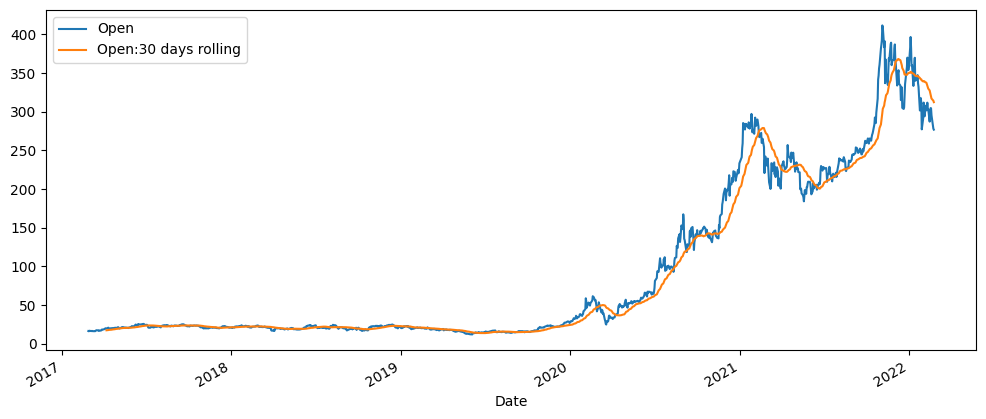

In [ ]:
df_tesla[['Open', 'Open:30 days rolling']].plot(figsize=(12,5))

*Assignment 1*
<br>
1. Read the Microsoft Data using Panda Datareader
2. Get maximum price of the share from 2017-2022
3. Which is the date of the highest price of the stock
4. Which is the date of the lowest price of stock

-----------


In [ ]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime
import yfinance as yf

company = 'TSLA'

# Define a start date and End Date
start = datetime(2017,2,27)
end =  datetime(2022,2,24)

# Read Stock Price Data
df_tesla = yf.download(company, start , end)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
df_tesla

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-02-27,16.544666,16.557333,16.134001,16.415333,16.415333,171912000
2017-02-28,16.279333,16.733334,16.260000,16.666000,16.666000,91171500
2017-03-01,16.945333,16.990000,16.607332,16.667999,16.667999,72142500
2017-03-02,16.647333,16.885332,16.551332,16.698668,16.698668,50277000
2017-03-03,16.716000,16.793333,16.600000,16.771334,16.771334,43791000
...,...,...,...,...,...,...
2022-02-16,304.683319,308.809998,300.403320,307.796661,307.796661,51294300
2022-02-17,304.420013,306.166656,291.366669,292.116669,292.116669,55178400
2022-02-18,295.333344,295.623322,279.203339,285.660004,285.660004,68501700


<Axes: xlabel='Date'>

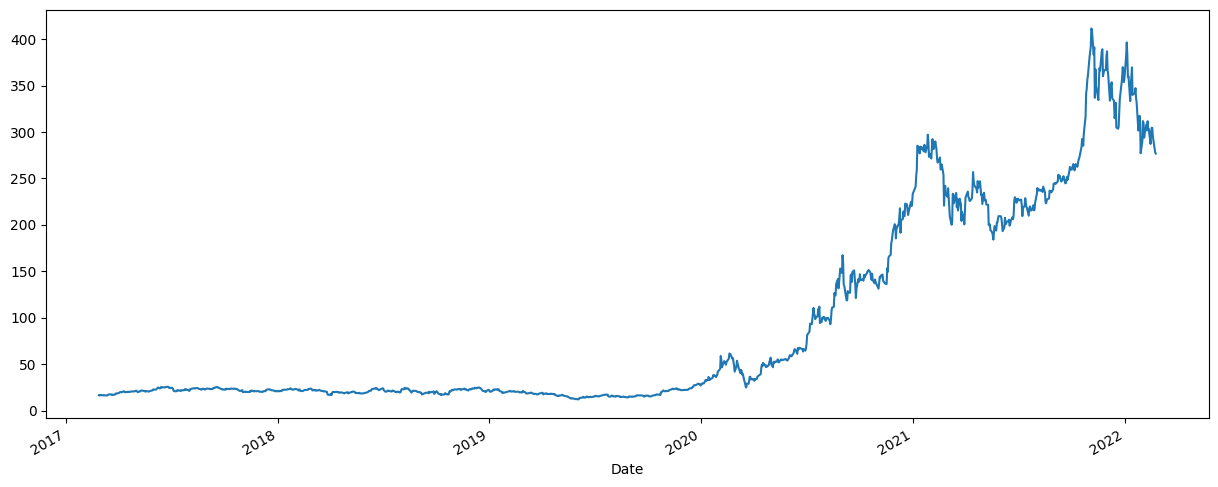

In [ ]:
# Simple Moving Average
df_tesla['Open'].plot(figsize=(15,6))

In [ ]:
df_tesla['Open: 10 days rolling'] = df_tesla['Open'].rolling(window=10, min_periods=1).mean()

In [ ]:
df_tesla.head(10)

,Open,High,Low,Close,Adj Close,Volume,Open: 10 days rolling
Date,,,,,,,
2017-02-27,16.544666,16.557333,16.134001,16.415333,16.415333,171912000,16.544666
2017-02-28,16.279333,16.733334,16.260000,16.666000,16.666000,91171500,16.412000
2017-03-01,16.945333,16.990000,16.607332,16.667999,16.667999,72142500,16.589778
2017-03-02,16.647333,16.885332,16.551332,16.698668,16.698668,50277000,16.604167
2017-03-03,16.716000,16.793333,16.600000,16.771334,16.771334,43791000,16.626533
2017-03-06,16.527332,16.780001,16.500668,16.747334,16.747334,50332500,16.610000
2017-03-07,16.794666,16.926001,16.554667,16.572666,16.572666,51892500,16.636381
2017-03-08,16.466667,16.671333,16.354668,16.458000,16.458000,55878000,16.615166
2017-03-09,16.508667,16.577333,16.200001,16.326668,16.326668,58189500,16.603333


<Axes: xlabel='Date'>

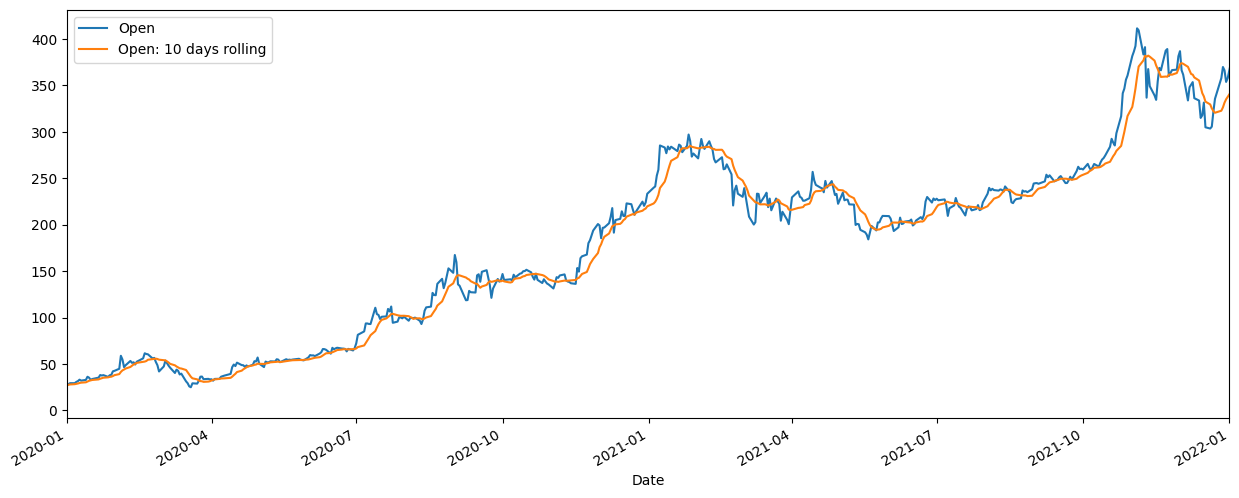

In [ ]:
df_tesla[['Open','Open: 10 days rolling']].plot(
  figsize=(15,6),
  xlim=['2020-01-01', '2022-01-01']
)

In [ ]:
df_tesla['Open: 20 days rolling'] = df_tesla['Open'].rolling(window=20, min_periods=1).mean()
df_tesla['Open: 30 days rolling'] = df_tesla['Open'].rolling(window=30, min_periods=1).mean()
df_tesla['Open: 50 days rolling'] = df_tesla['Open'].rolling(window=50, min_periods=1).mean()

<Axes: xlabel='Date'>

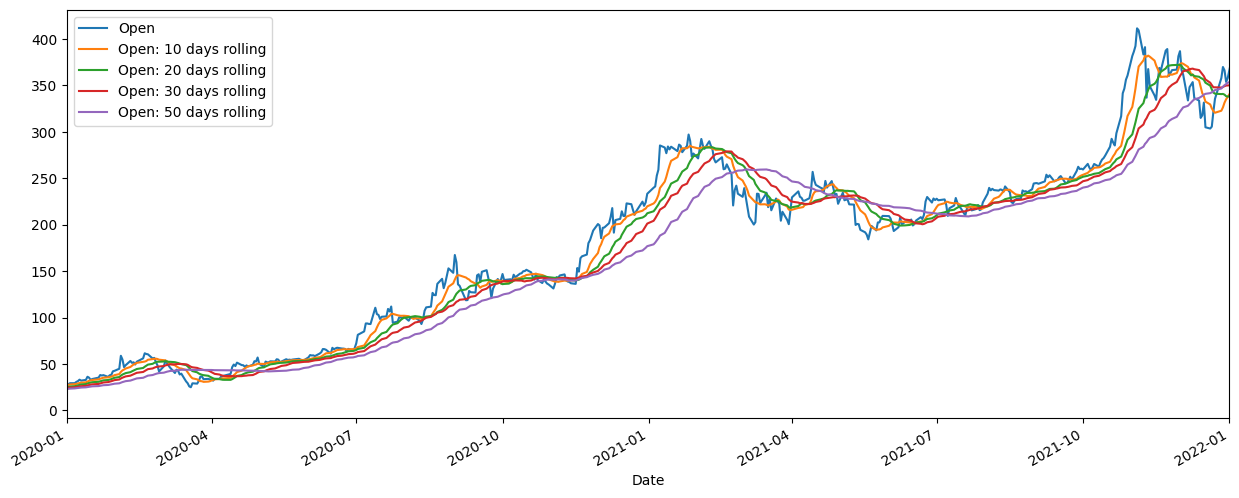

In [ ]:
df_tesla[['Open','Open: 10 days rolling', 'Open: 20 days rolling', 'Open: 30 days rolling', 'Open: 50 days rolling']].plot(
  figsize=(15,6),
  xlim=['2020-01-01', '2022-01-01']
)

<Axes: xlabel='Date'>

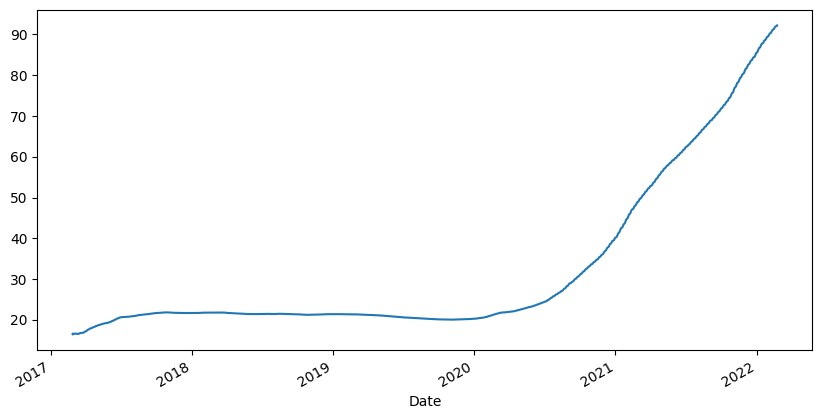

In [ ]:
# Expanding
# Cumulative Moving Average
df_tesla['Open'].expanding().mean().plot(figsize=(10,5))

In [ ]:
# Exponential Moving Average
# let smoothing factor be 0.1
df_tesla['EMA_0.1'] = df_tesla['Open'].ewm(alpha=0.1, adjust=False).mean()

<Axes: xlabel='Date'>

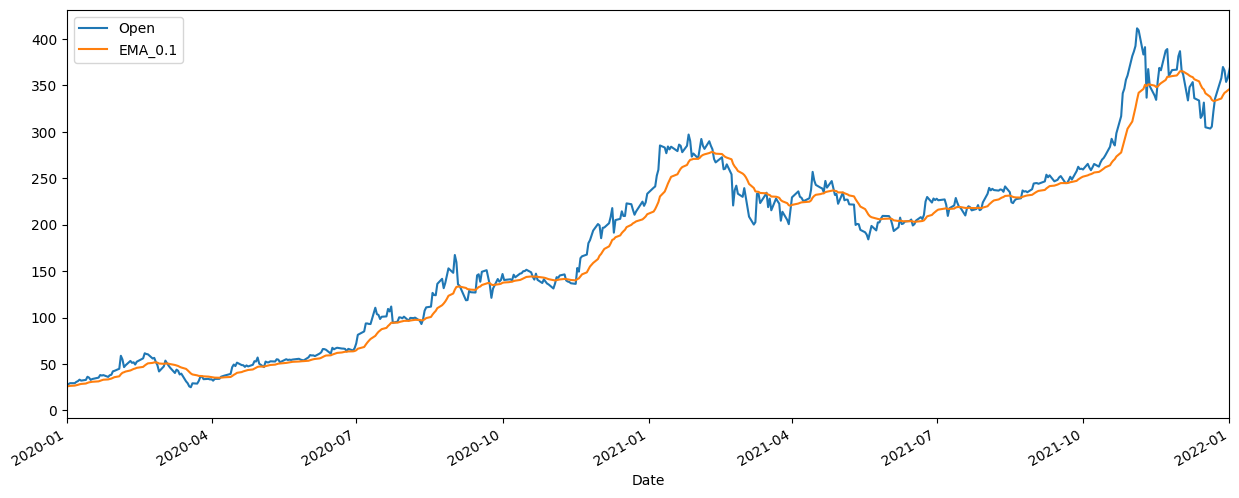

In [ ]:
df_tesla[['Open', 'EMA_0.1']].plot(
    figsize=(15,6),
    xlim=['2020-01-01', '2022-01-01']
    )

In [ ]:
df_tesla['EMA_0.3'] = df_tesla['Open'].ewm(alpha=0.3, adjust=False).mean()

<Axes: xlabel='Date'>

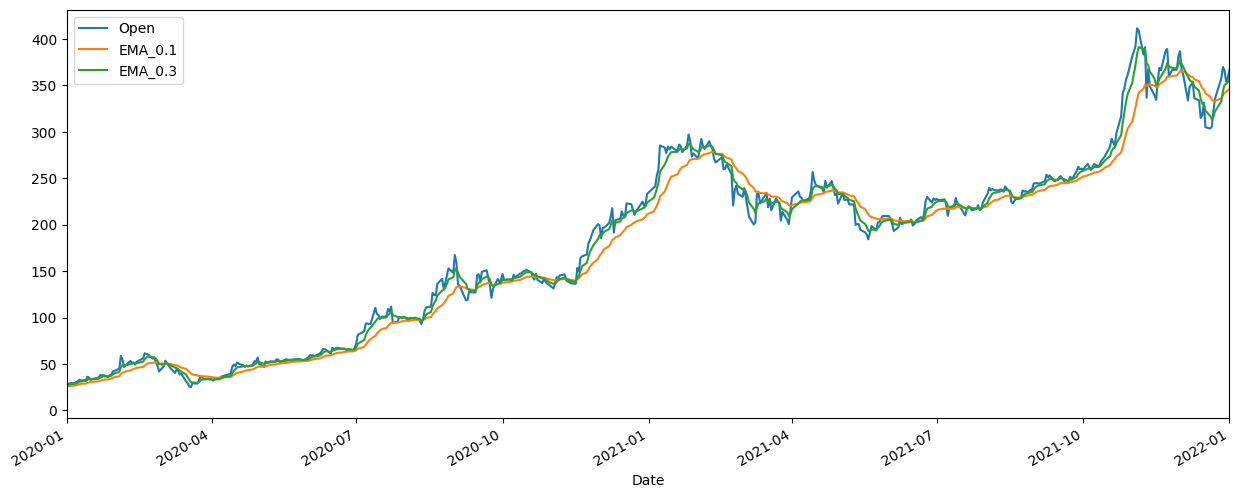

In [ ]:
df_tesla[['Open', 'EMA_0.1', 'EMA_0.3']].plot(
    figsize=(15,6),
    xlim=['2020-01-01', '2022-01-01']
    )

In [ ]:
# Exponential Weighted Moving Average
df_tesla['EWMA_5days'] = df_tesla['Open'].ewm(span=5).mean()


<Axes: xlabel='Date'>

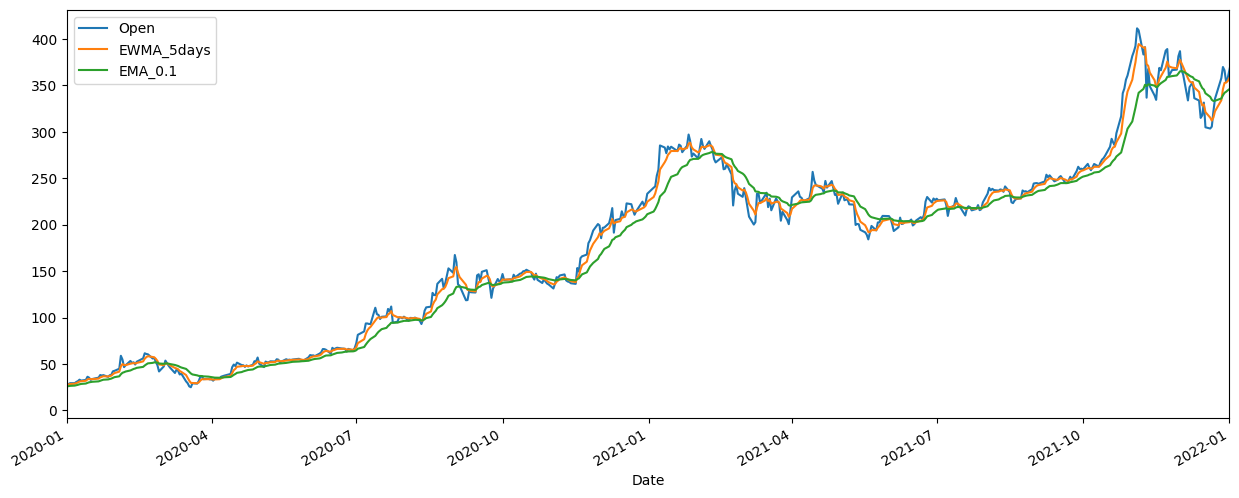

In [ ]:
df_tesla[['Open', 'EWMA_5days', 'EMA_0.1']].plot(
    figsize=(15,6),
    xlim=['2020-01-01', '2022-01-01']
)

## ARIMA

In [ ]:
! wget https://github.com/krishnaik06/Live-Time-Series/blob/main/airline_passengers.csv

--2024-07-08 13:05:59--  https://github.com/krishnaik06/Live-Time-Series/blob/main/airline_passengers.csv
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘airline_passengers.csv’

airline_passengers.     [  <=>               ] 351.02K   970KB/s    in 0.4s    

2024-07-08 13:06:00 (970 KB/s) - ‘airline_passengers.csv’ saved [359441]



In [ ]:
! wget https://raw.githubusercontent.com/eyash24/Live-Time-Series/main/airline_passengers.csv

--2024-07-08 13:14:13--  https://raw.githubusercontent.com/eyash24/Live-Time-Series/main/airline_passengers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2050 (2.0K) [text/plain]
Saving to: ‘airline_passengers.csv’

airline_passengers. 100%[===================>]   2.00K  --.-KB/s    in 0s      

2024-07-08 13:14:13 (25.0 MB/s) - ‘airline_passengers.csv’ saved [2050/2050]



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd

%matplotlib inline

In [ ]:
df_airline = pd.read_csv('airline_passengers.csv')
df_airline.head()

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [109]:
df_airline.tail()

,Month,Thousands of Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [111]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [112]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Month                    144 non-null    object
 1   Thousands of Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [113]:
# Converting object type to datetime type
df_airline['Month'] = pd.to_datetime(df_airline['Month'])

In [114]:
df_airline.set_index('Month', inplace=True)

In [115]:
df_airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<Axes: xlabel='Month'>

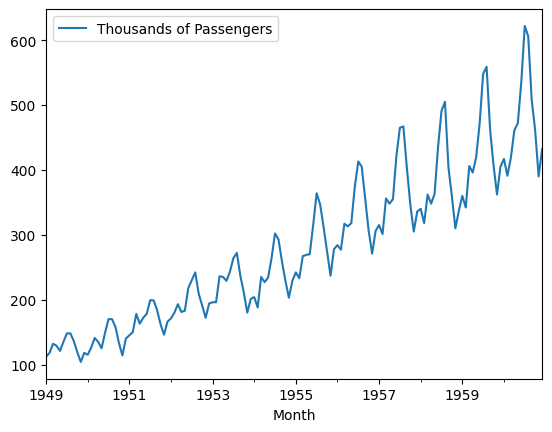

In [116]:
df_airline.plot()

**Observation**
1. Data is seasonal data

In [117]:
from statsmodels.tsa.stattools import adfuller

In [123]:
def adf_test(series):
  result = adfuller(series)
  print('ADF statistics: ', result[0])
  print('p-value: ', result[1])

  if result[1] <= 0.05:
    print('Reject Null Hypothesis: data is stationary')
  else:
    print('Accept Null Hypothesis: data is not stationary')

In [119]:
adf_test(df_airline['Thousands of Passengers'])

ADF statistics:  0.8153688792060498
p-value:  0.991880243437641
Accept Null Hypothesis: data is not stationary


In [120]:
# Use Differencing Technique
df_airline['Passengers First Difference'] = df_airline['Thousands of Passengers'] - df_airline['Thousands of Passengers'].shift(1)

In [121]:
df_airline.head()

,Thousands of Passengers,Passengers First Difference
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0


In [124]:
adf_test(df_airline['Passengers First Difference'].dropna())

ADF statistics:  -2.8292668241700047
p-value:  0.05421329028382478
Accept Null Hypothesis: data is not stationary


In [125]:
# Second Differencing
df_airline['Passengers Second Difference'] = df_airline['Passengers First Difference'] - df_airline['Passengers First Difference'].shift(1)

In [126]:
df_airline.head()

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,8.0
1949-04-01,129,-3.0,-17.0
1949-05-01,121,-8.0,-5.0


In [127]:
adf_test(df_airline['Passengers Second Difference'].dropna())

ADF statistics:  -16.384231542468513
p-value:  2.7328918500142026e-29
Reject Null Hypothesis: data is stationary


In [130]:
## Seasonal data - 12 Months
df_airline['Passengers 12 Difference'] = df_airline['Thousands of Passengers'] - df_airline['Thousands of Passengers'].shift(12)

In [131]:
df_airline.head()

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,8.0,NaN
1949-04-01,129,-3.0,-17.0,NaN
1949-05-01,121,-8.0,-5.0,NaN


In [132]:
adf_test(df_airline['Passengers 12 Difference'].dropna())

ADF statistics:  -3.383020726492481
p-value:  0.011551493085514952
Reject Null Hypothesis: data is stationary


In [128]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

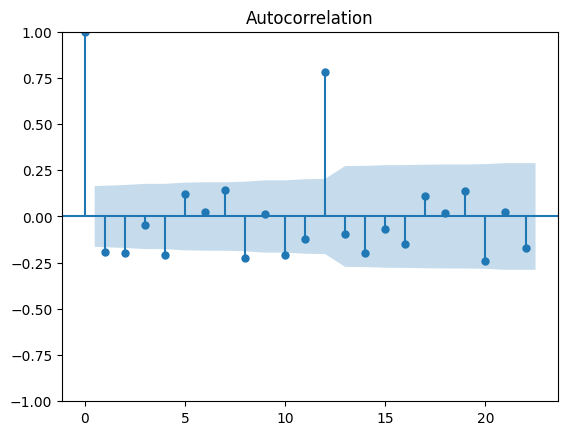

In [133]:
acf = plot_acf(df_airline['Passengers Second Difference'].dropna())

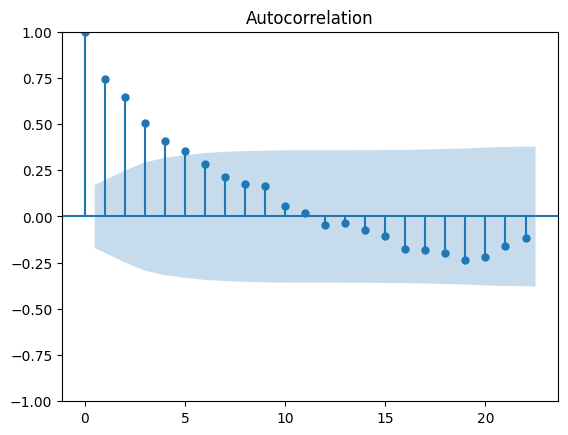

In [135]:
acf_12 = plot_acf(df_airline['Passengers 12 Difference'].dropna())

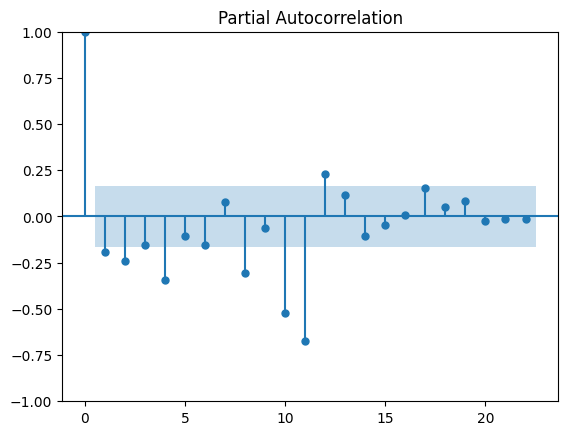

In [134]:
result = plot_pacf(df_airline['Passengers Second Difference'].dropna())

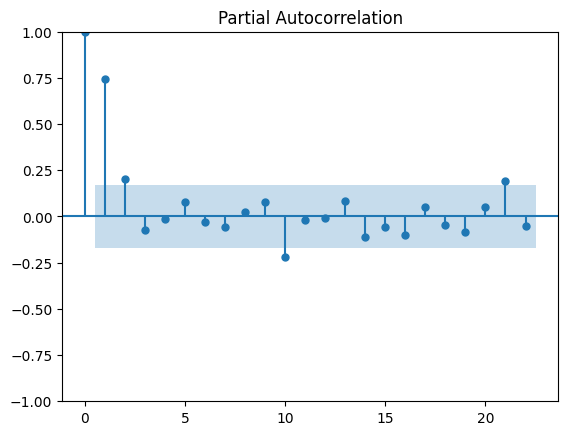

In [136]:
result_12 = plot_pacf(df_airline['Passengers 12 Difference'].dropna())

In [137]:
# Split train and test data
from datetime import datetime, timedelta

train_dataset_end = datetime(1955,12,1)
test_dataset_end = datetime(1960, 12, 1)

In [139]:
train_data = df_airline[:train_dataset_end]
test_data = df_airline[train_dataset_end+timedelta(days=1):test_dataset_end]

In [141]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1956-01-01,284,6.0,-35.0,42.0
1956-02-01,277,-7.0,-13.0,44.0
1956-03-01,317,40.0,47.0,50.0
1956-04-01,313,-4.0,-44.0,44.0
1956-05-01,318,5.0,9.0,48.0
1956-06-01,374,56.0,51.0,59.0
1956-07-01,413,39.0,-17.0,49.0
1956-08-01,405,-8.0,-47.0,58.0
1956-09-01,355,-50.0,-42.0,43.0


In [144]:
# Model Creation
from statsmodels.tsa.arima.model import ARIMA

In [145]:
model_ARIMA = ARIMA(train_data['Thousands of Passengers'], order=(10,2,12))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [146]:
model_ARIMA_fit = model_ARIMA.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [147]:
model_ARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                   84
Model:                    ARIMA(10, 2, 12)   Log Likelihood                -307.735
Date:                     Mon, 08 Jul 2024   AIC                            661.469
Time:                             15:03:01   BIC                            716.824
Sample:                         01-01-1949   HQIC                           683.693
                              - 12-01-1955                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0468      0.115      0.408      0.683      -0.178       0.271
ar.L2         -1.0429      0.084    -12.479      0.000      -1.207      -0.879
ar.L3          0.0886      0.139      0.638      0.523      -0.183       0.361
ar.L4         -1.0259      0.131     -7.825      0.000      -1.283      -0.769
ar.L5          0.0658      0.155      0.423      0.672      -0.239       0.370
ar.L6         -0.9861      0.143     -6.882      0.000      -1.267      -0.705
ar.L7          0.0175      0.142      0.123      0.902      -0.261       0.296
ar.L8         -0.9822      0.122     -8.030      0.000      -1.222      -0.742
ar.L9         -0.0069      0.095     -0.073      0.942      -0.193       0.179
ar.L10        -0.9389      0.085    -11.096      0.000      -1.105      -0.773
ma.L1         -1.2855      0.254     -5.057      0.000      -1.784      -0.787
ma.L2          1.2393      0.359      3.455      0.001       0.536       1.942
ma.L3         -1.4415      0.437     -3.302      0.001      -2.297      -0.586
ma.L4          1.3761      0.507      2.713      0.007       0.382       2.370
ma.L5         -1.2166      0.575     -2.116      0.034      -2.344      -0.090
ma.L6          1.0831      0.660      1.640      0.101      -0.211       2.378
ma.L7         -1.0701      0.715     -1.497      0.134      -2.471       0.331
ma.L8          0.8861      0.819      1.082      0.279      -0.719       2.491
ma.L9         -0.7852      0.737     -1.066      0.287      -2.229       0.659
ma.L10         0.5230      0.601      0.870      0.384      -0.656       1.702
ma.L11        -0.4130      0.455     -0.908      0.364      -1.305       0.479
ma.L12         0.1336      0.273      0.489      0.625      -0.402       0.669
sigma2        77.2663     16.217      4.764      0.000      45.481     109.052
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 4.74
Prob(Q):                              0.99   Prob(JB):                         0.09
Heteroskedasticity (H):               2.12   Skew:                             0.59
Prob(H) (two-sided):                  0.06   Kurtosis:                         2.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [149]:
# prediction
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [152]:
pred = model_ARIMA_fit.predict(start=pred_start_date, end=pred_end_date)
residuals = test_data['Thousands of Passengers'] - pred

In [ ]:
residuals

In [ ]:
pred

<Axes: ylabel='Density'>

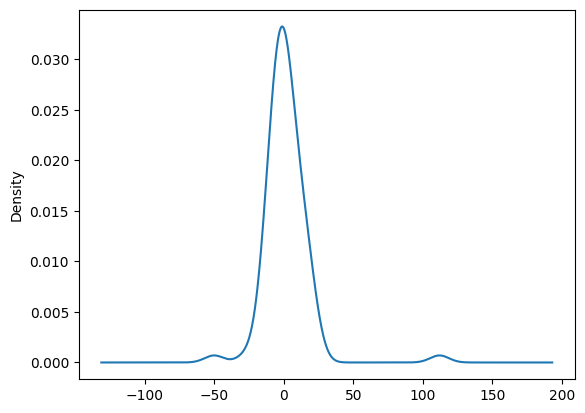

In [155]:
model_ARIMA_fit.resid.plot(kind='kde')

In [156]:
test_data['Predicted_ARIMA'] = pred

<ipython-input-156-90918ede9522>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA'] = pred


In [ ]:
test_data

<Axes: xlabel='Month'>

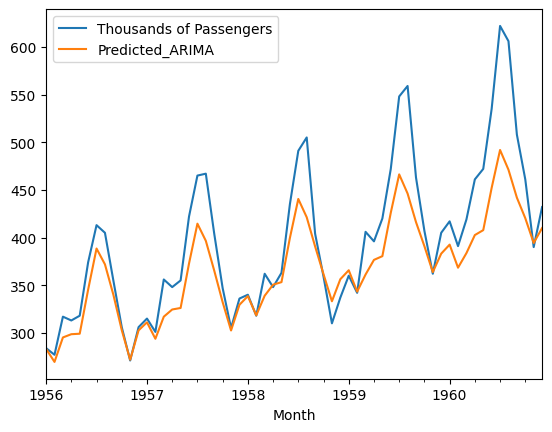

In [158]:
test_data[['Thousands of Passengers', 'Predicted_ARIMA']].plot()

In [161]:
# Model Creation 2
# SARIMAX
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [162]:
model_SARIMAX = SARIMAX(
    train_data['Thousands of Passengers'],
    order=(3,0,5),
    seasonal_order=(1,1,1,12)
)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [163]:
model_SARIMAX_fit = model_SARIMAX.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [164]:
model_SARIMAX_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:              Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(1, 1, [1], 12)   Log Likelihood                -263.917
Date:                              Mon, 08 Jul 2024   AIC                            549.834
Time:                                      15:17:38   BIC                            574.877
Sample:                                  01-01-1949   HQIC                           559.804
                                       - 12-01-1955                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5538      3.179      0.174      0.862      -5.678       6.785
ar.L2          0.8495      0.374      2.270      0.023       0.116       1.583
ar.L3         -0.4145      2.894     -0.143      0.886      -6.088       5.259
ma.L1          0.2074      3.097      0.067      0.947      -5.862       6.277
ma.L2         -0.5096      2.283     -0.223      0.823      -4.984       3.965
ma.L3         -0.0947      0.661     -0.143      0.886      -1.391       1.202
ma.L4         -0.1901      0.509     -0.373      0.709      -1.188       0.808
ma.L5          0.1674      0.870      0.192      0.847      -1.538       1.873
ar.S.L12      -0.3132      0.853     -0.367      0.714      -1.985       1.359
ma.S.L12       0.1031      0.939      0.110      0.913      -1.736       1.943
sigma2        83.8928     28.583      2.935      0.003      27.870     139.915
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 1.90
Prob(Q):                              0.91   Prob(JB):                         0.39
Heteroskedasticity (H):               2.41   Skew:                             0.40
Prob(H) (two-sided):                  0.04   Kurtosis:                         2.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [165]:
# prediction
pred_SARIMAX = model_SARIMAX_fit.predict(start=pred_start_date, end=pred_end_date)
residuals = test_data['Thousands of Passengers']-pred_SARIMAX

In [ ]:
pred_SARIMAX

In [ ]:
residuals

<Axes: xlabel='Month'>

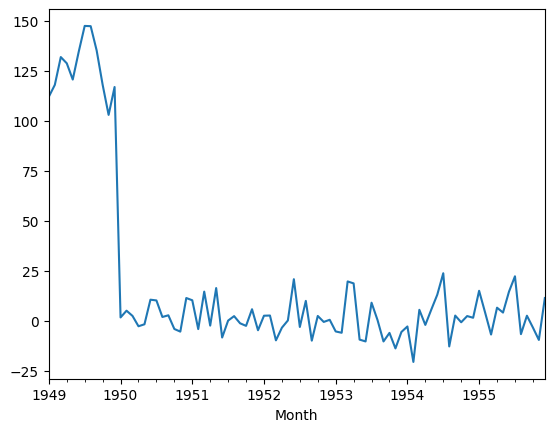

In [168]:
model_SARIMAX_fit.resid.plot()

<Axes: ylabel='Density'>

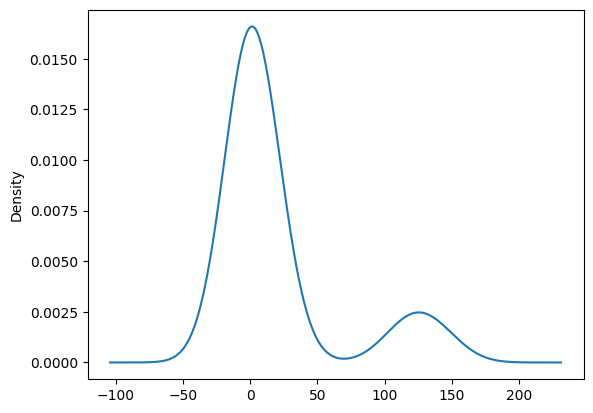

In [169]:
model_SARIMAX_fit.resid.plot(kind='kde')

In [170]:
test_data['Predicted_SARIMAX'] = pred_SARIMAX

<ipython-input-170-5b0cbb3e2b67>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMAX'] = pred_SARIMAX


<Axes: xlabel='Month'>

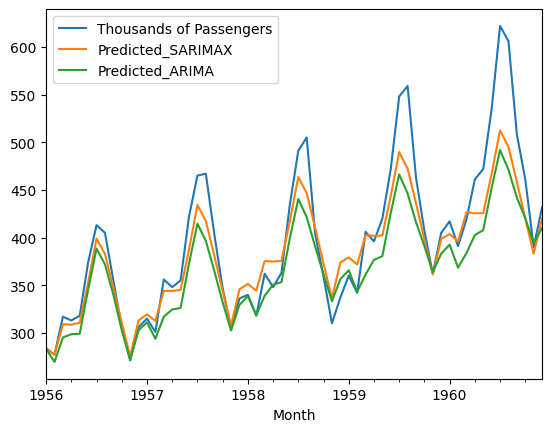

In [171]:
test_data[['Thousands of Passengers', 'Predicted_SARIMAX', 'Predicted_ARIMA']].plot()